# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission) adding your SCIPER number in title, example: m2-calcularis-456392.ipynb


## Brief overview of Calcularis
[Calcularis](https://school.alemira.com/de/calcularis/) by Alemira School is a mathematics learning program developed with neuroscientists and computer scientists from ETH Zurich. It promotes the development and interaction of the different areas of the brain that are responsible for processing numbers and quantities and solving mathematical tasks. Calcularis can be used from 1st grade to high school. Children with dyscalculia also benefit in the long term and overcome their arithmetic weakness.


For the guided part of the exploration we will focus on the three main tables:
* ***users***: meta information about users (i.e. total time spent learning with Calcularis, geographic location).
* ***events***: events done by the users in the platform (i.e. playing a game, selecting a new animal in the zoo simulation).
* ***subtasks***: sub-tasks with answer attempts solved by users, primarily in the context of game events.

### Users
* **user_id**: unique identifier of user in database.
* **learning_time_ms**: total learning time in milliseconds per user, totaled over all events. This is calculated by subtracting non-learning time (i.e. if the user is idle for more than one minute).
* **start**: timestamp of initial login.
* **end**: timestamp of last log-off.
* **logged_in_time_ms**: total time between login and log-off, in milliseconds. This will always be larger than learning_time_ms.
* **language**: code for language the user is using Calcularis in (i.e. *fr* for French, *de* for german).
* **country**: code for the country the user is using Calcularis from (i.e. *CH* for Switzerland).

### Events
* **event_id**: unique identifier of event in database.
* **user_id**: user who peformed the event.
* **type**: type of event (task, help, game_start_pause, training_selector, shop, attention_booster, attention_booster_over).
* **mode**: only valid for events of type 'task', representing type of game play (normal, end_of_nr: end of number range, free_training, repetition, favorite, practice).
* **game_name**: name of the game the user is playing. Calcularis has 29 games.
* **learning_time_ms**: total learning time over a single game (event). To see aggregated learning time, examine learning_time_ms in the users table.
* **number_range**: the number range of the exercise (0-10, 0-20, ... 0-1000). The larger the number range, the more difficult the exercise variation.
* **start**: start timestamp of the event.
* **end**: end timestamp of the event.
* **skill_id**: skill number that this game (event) corresponds to.

### Subtasks
*There are many columns in subtasks corresponding to fields present for specific games in Calcularis. More details about corresponding fields for subtasks can be found [here](https://drive.google.com/file/d/1C7bKfHDdKnDzr9-EqWniYoR35ro2QuBd/view?usp=sharing). The fields discussed below are present for the majority of subtasks.*

* **subtask_id**: unique identifier of the subtask in the database.
* **event_id**: unique identifier of event in database.
* **user_id**: user who peformed the event.
* **answer**: the user's answer to the subtask.
* **correct**: `True` if user obtained the correct value in their answer attempt.
* **correctAnswerObject**: the correct answer to the question.
* **hasProperResult**: `True` if this is a question that can be answered by a student. `False` if it corresponds to the SecretNumber game tasks, which consists of counting attempts.
* **range**: number_range for the task (i.e. 0-20 described as R20).
* **subtask_finished_timestamp**: ending timestamp for this subtask (within a specific event).
* **type**: type of subtask event like ConciseEquationTaskDescription, ConciseOrderingTaskDescription (mostly corresponding to individual games, as detailed in the *Subtask Representations* document below).

### Useful Metadata Files
- [Subtask Representations](https://drive.google.com/file/d/1C7bKfHDdKnDzr9-EqWniYoR35ro2QuBd/view?usp=sharing)
- [Number Representations](https://docs.google.com/document/d/1iD60mydGXjB-6HBQakAKI_GGfQaBBQkWcg5eQiAch_A/edit?usp=sharing)
- [Ideas for Calcularis analysis from the Alemira School](https://docs.google.com/document/d/1vM0Gz4f0jStp_wuhBYvnP-VjaBAxzQpVzXomaDfq0D8/edit?usp=sharing)
- [Skill map](https://drive.google.com/file/d/1yJTosk1RV1qzHb-AG_-FLdjlphBsYzoq/view?usp=sharing) representing the relationships between exercises in Calcularis. If you would like to dive deeper into the skill network (programatically), you can use this [.dot file](https://docs.google.com/document/d/1XDPkq7LaAQ3-lAhAvDTLXuiq5u8EKJME/edit?usp=share_link&ouid=104052806655845468726&rtpof=true&sd=true) representing the graph and the corresponding [labels](https://drive.google.com/file/d/1Pkbiz-_bzK80q2l3mkBS_K4wU9sSCY-R/view?usp=sharing).

In [3]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DATA_DIR = '../../data/00_data_full' #You many change the directory
users = pd.read_csv('{}/full_calcularis_users.csv'.format(DATA_DIR), index_col=0)
events = pd.read_csv('{}/full_calcularis_events.csv'.format(DATA_DIR), index_col=0)
subtasks = pd.read_csv('{}/full_calcularis_subtasks.csv'.format(DATA_DIR), index_col=0)

# DATA_DIR = 'Calcularis/00_data_1000_students' #You many change the directory
# users = pd.read_csv('{}/calcularis_small_users.csv'.format(DATA_DIR), index_col=0)
# events = pd.read_csv('{}/calcularis_small_events.csv'.format(DATA_DIR), index_col=0)
# subtasks = pd.read_csv('{}/calcularis_small_subtasks.csv'.format(DATA_DIR), index_col=0)

In [2]:
users.head(5)

,learning_time_ms,start,end,logged_in_time_ms,language,country
user_id,,,,,,
1,14032710,2022-11-02T08:37:56.549Z,2023-02-09T11:08:02.599Z,22151340,de,CH
2,16268350,2022-09-07T07:53:38.865Z,2023-02-09T08:39:14.692Z,85421273,nl,NL
3,8012030,2021-09-27T07:45:51.806Z,2022-01-13T12:14:09.565Z,16651482,de,DE
4,1414421,2019-11-12T12:18:15.724Z,2020-10-02T09:20:28.798Z,4561768,de,CH
5,17502108,2022-04-26T11:38:44.114Z,2022-08-29T15:52:11.087Z,25601470,de,CH


In [3]:
events.head()

,user_id,mode,game_name,learning_time_ms,number_range,start,end,skill_id,type
event_id,,,,,,,,,
0,1,NORMAL,Subitizing,8835.0,R10,2022-11-02T08:39:12.355Z,2022-11-02T08:39:25.130Z,1.0,task
1,1,NORMAL,Conversion,21167.0,R10,2022-11-11T10:26:27.893Z,2022-11-11T10:26:49.260Z,4.0,task
2,1,NORMAL,Conversion,11182.0,R10,2022-11-18T10:34:01.044Z,2022-11-18T10:34:12.423Z,7.0,task
3,1,NORMAL,Landing,6823.0,R10,2022-11-25T10:32:43.428Z,2022-11-25T10:32:56.986Z,19.0,task
4,1,END_OF_NR,Conversion,9107.0,R10,2022-12-02T10:44:40.555Z,2022-12-02T10:44:49.874Z,7.0,task


In [4]:
print(events['type'].unique())

['task' 'TRAINING_SELECTOR' 'ZOO' 'OVERVIEW' 'HELP' 'SHOP'
 'ATTENTION_BOOSTER' 'GAME_START_PAUSE']


In [5]:
subtasks.head()

,event_id,user_id,aim,answer,answerMode,availableNumbers,correct,correctAnswerObject,correctNumber,destination,...,timeoutInSeconds,timeoutInSteps,type,upperBound,step,orderIndependent,divisor,larger,smaller,timeout
subtask_id,,,,,,,,,,,,,,,,,,,,,
1,1,2,NaN,4,NaN,NaN,False,1,1.0,NaN,...,NaN,NaN,ConciseSubitizingTaskDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,NaN,2,NaN,NaN,True,NaN,NaN,NaN,...,0.0,2.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,NaN,6,NaN,NaN,True,6,NaN,ARABIC,...,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,7.0,"{'b': 6.7354193, 'a': 7}",NaN,NaN,True,"{'b': 7.0, 'a': 7}",NaN,NaN,...,NaN,NaN,ConciseLandingTaskDescription,7.5,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2,1.0,"{'b': 1.0453212, 'a': 1}",NaN,NaN,True,"{'b': 1.0, 'a': 1}",NaN,NaN,...,NaN,NaN,ConciseLandingTaskDescription,1.5,NaN,NaN,NaN,NaN,NaN,NaN


## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [6]:
## Your code goes here
print(f'There is {len(users)} distinct participants in the data set\n\n')

#just a check
#print(len(events['user_id'].unique()))
#print(events['user_id'].unique())  # some users don't have events, i.e. user_id 78, 118, 119,...

There is 64932 distinct participants in the data set




#### b) How many games were played per user? Please provide a visualization and discuss the distribution.

Mean number of games played per user: 33.62680958541243
Mean number of different games played per user: 7.038948438366291


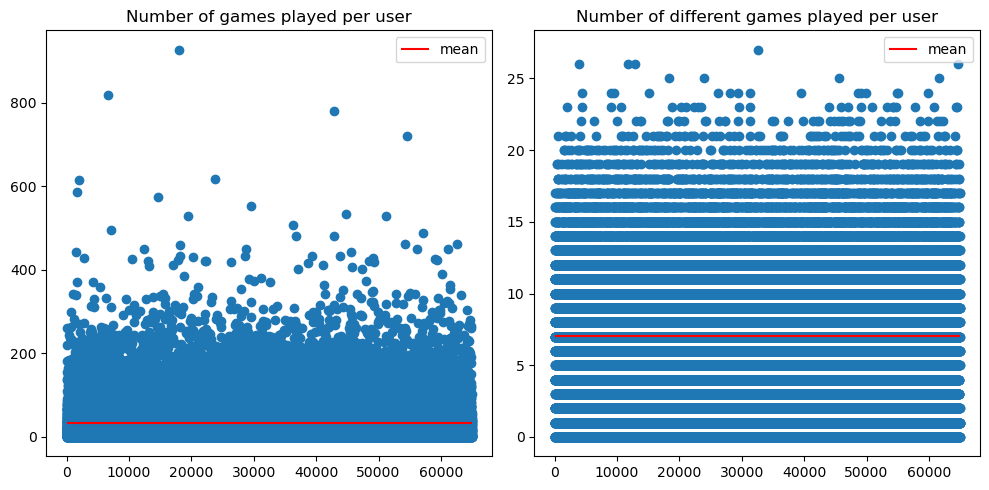

In [7]:
# Your code goes here
nb_games_per_user = np.zeros(len(users))
nb_diff_games_per_user = np.zeros(len(users))
for i in range(len(users)):
    mask = events['user_id'] == i+1
    selected_rows = events.loc[mask]
    games_per_user = selected_rows[['user_id', 'game_name']]
    nb_games_per_user[i] = len(games_per_user['game_name'])
    nb_diff_games_per_user[i] = len(games_per_user['game_name'].unique())

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.scatter(np.arange(len(users)), nb_games_per_user)
ax1.hlines(np.mean(nb_games_per_user), 0, len(users), colors = 'r', linestyles = '-', label='mean')
ax1.set_title('Number of games played per user')
ax1.legend()

ax2.scatter(np.arange(len(users)), nb_diff_games_per_user)
ax2.hlines(np.mean(nb_diff_games_per_user), 0, len(users), colors = 'r', linestyles = '-', label='mean')
ax2.set_title('Number of different games played per user')
ax2.legend()

fig.tight_layout()

print(f'Mean number of games played per user: {np.mean(nb_games_per_user)}')
print(f'Mean number of different games played per user: {np.mean(nb_diff_games_per_user)}')


**Discussion/interpretation**

First, one can see that in general, a user plays one game several times. On average, a user plays 7.196 different games and 34.094 games in total.
The distributions are pretty uniform, especially for the number of different games played per user (see fig. on the right).

#### c) What are the 10 most popular games played (events)? Please provide visualizations of the frequency of the top 10 games.

Hint: See `game_name` in table `events`.

Text(0.5, 1.0, 'Frequencies of the top 10 games')

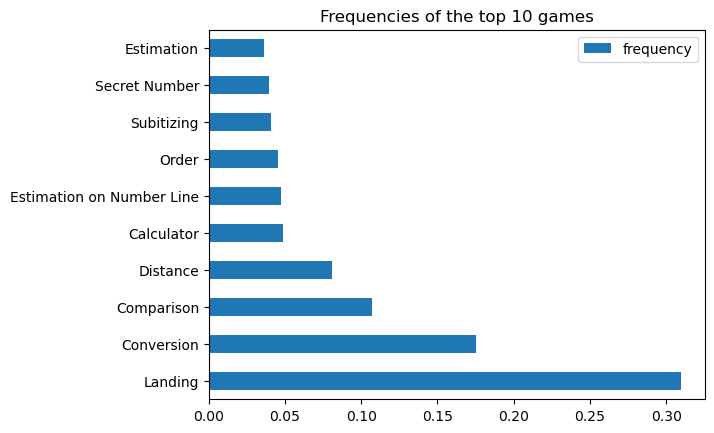

In [8]:
# Your code goes here
from collections import Counter
import seaborn as sns

most_popular = dict(Counter(events['game_name']))
freq_df = pd.DataFrame(columns = ['frequency'])

for key, val in most_popular.items():
    freq_df.loc[key] = val/len(events)

top_10_games = freq_df.sort_values(by = ['frequency'], ascending=False).head(10).round(4)

top_10_games.plot(kind='barh')
plt.title('Frequencies of the top 10 games')

**Discussion/interpretation**

There is mostly 4 games that users play a lot with. Among the top 10, the 6 last have pretty much the same frequency

It could be interesting to know the reason of such a distribution. An hypothesis could be that the first 4 games are the hardest and once the 4th one is passed, the users keep going. The higher frequency of those first 4 games could be explained by their difficulty and users are either stuck or move on and are sent back to the previous ones to strengthen sub-skills needed to succeed on the failed exercise.

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, ui_locale, num_events, num_games, percentage_correct, total_not_learning_time_ms]``


The features are defined as follows:

- **ui_locale**: geographic region the student is from

- **num_events**: total number of events of the student  

- **num_games**: total number of unique games played by the student

- **percentage_correct**: number of correct answers/total number of answers (hint: see `correct` in subtask table).

- **total_not_learning_time_ms**: total amount of ms not spent actively learning

In [9]:
# Your code for building the data frame here
task_2a = pd.DataFrame()
task_2a['ui_locale'] = users['country']
task_2a['num_events'] = nb_games_per_user
task_2a['num_games'] = nb_diff_games_per_user

percentage = np.zeros(len(users))
for i in range(len(users)):
    mask = subtasks['user_id'] == i+1
    selected_rows = subtasks[mask]
    answers = selected_rows[['user_id', 'correct']]
    total_answers = len(answers)
    percentage[i] = np.sum(answers['correct'] == True)/(total_answers if total_answers != 0 else 1)
    
task_2a['percentage_correct'] = percentage.round(3)
task_2a['total_not_learning_time_ms'] = users['logged_in_time_ms'] - users['learning_time_ms']

task_2a.head()

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms
user_id,,,,,
2,NL,0.0,0.0,0.000,400691790
3,NaN,261.0,17.0,0.847,12402730
4,CH,57.0,11.0,0.721,54263650
5,CH,77.0,10.0,0.777,17010764
6,CH,44.0,15.0,0.823,23906682


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (`ui_locale, num_events, num_games, percentage_correct, total_not_learning_time_ms`) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [10]:
print(task_2a['ui_locale'].unique())

['NL' nan 'CH' 'BE' 'DE' 'AT' 'SE' 'TR' 'CA' 'US' 'GB' 'ES' 'FR' 'RU' 'NO'
 'IT' 'BR']


In [11]:
# Your code for univariate analysis here
numerical = task_2a.describe(exclude= ['object'])
categorical = task_2a.describe(include= ['object'])
stats = pd.concat([categorical, numerical])
stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
percentage = task_2a.isnull().sum(axis = 0)*100 / len(task_2a)
stats.loc['missing_values'] = np.array(percentage)
stats

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms
mean,NaN,33.626810,7.038948,0.692204,2.376202e+07
std,NaN,44.315953,4.709046,0.258576,5.688410e+07
50%,NaN,19.000000,7.000000,0.767000,1.038568e+07
unique,16,NaN,NaN,NaN,NaN
top,CH,NaN,NaN,NaN,NaN
freq,28964,NaN,NaN,NaN,NaN
missing_values,24.878334,0.000000,0.000000,0.000000,0.000000e+00


<module 'matplotlib.pyplot' from '/home/violeta/anaconda3/envs/mlbd/lib/python3.9/site-packages/matplotlib/pyplot.py'>

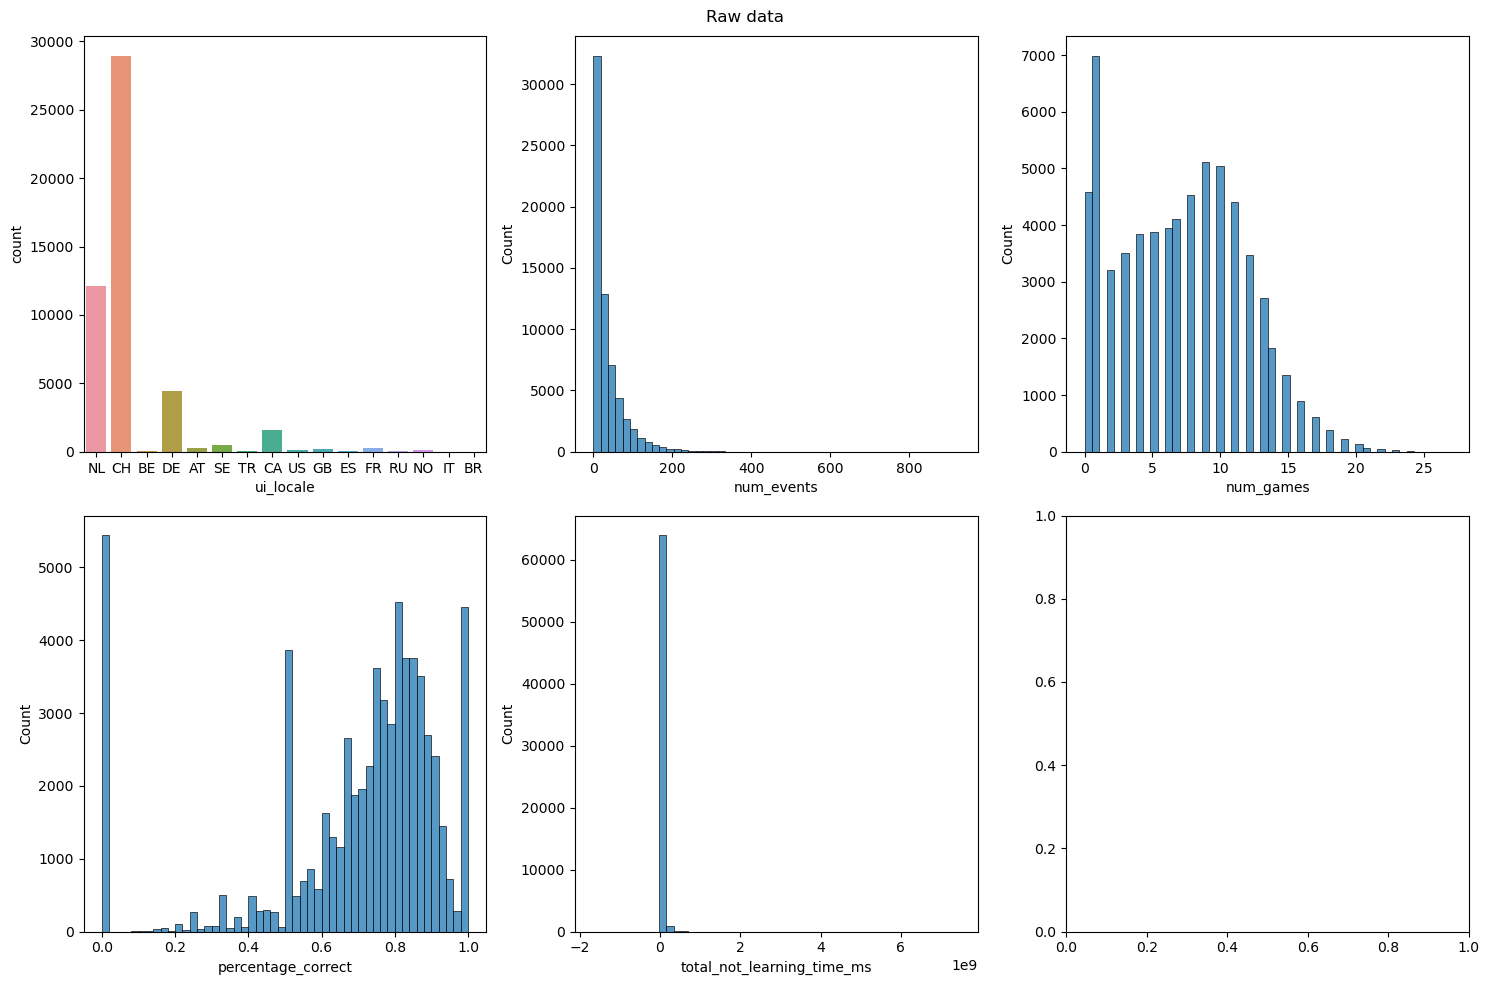

In [12]:
def plot_features(df, title):
        continuous_cols = list(df._get_numeric_data().columns)
        categorical_cols = list(set(df.columns) - set(continuous_cols))
        fig, axes = plt.subplots(2, 3, figsize=(15,10))
        for i, col in enumerate(df.columns):
            ax = axes[i // 3, i % 3]
            data = df[~df[col].isna()]
            if col in continuous_cols:
                sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
            elif col in categorical_cols:
                sns.countplot(data=data, x=col, ax=ax)
            else:
                print(col)
        fig.suptitle(title)
        fig.tight_layout()
        return plt
    
plot_features(task_2a,"Raw data")

#task_2a[(task_2a == np.nan)] = np.nan
#plot_features(task_2a, "Data without nan values")

**Discussion/interpretation**

First, one can note that there are not any anomalies except for the feature 'ui_locale' that has approximately one quarter of missing values (nan value). There is a big majority of Swiss users, which does not take into account the 25% missing. So this conclusion regarding the nationality most represented needs to be taken with caution. 

The distributions of the 'num_events' and 'total_not_learning_time_ms' are similar, namely decreasing exponentially.

The 'percentage_correct' feature has kind of an approximate normal distribution, with abnormal peaks at 0, around 0.5 and 1, which alter the mean that is at 0.695 whereas the distribution looks centered around 0.8 on the histogram. The peak at 0 might be due to the ones who have not played any games (see peak at 0 in num_events feature too) and thus have a percentage_correct of 0. Actually, as seen in task 1-a there is only 926 unique user_id in the events dataframe, so 74 users have not played any game, which is confirmed by the graph of num_games in the upper-right corner above (see first bar). 

It could also be interesting to investigate the causes of the 2 peaks of percentage_correct around 0.5 and 1, and the peak at 0, that is maybe not fully explained by the users who have not played any games. Maybe some failed all the games they played.

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

*Your feature descriptions and arguments/hypotheses go here*

I chose the following 2 additional features:
- **percentage_correct_adj**: The percentage of correct answers adjusted among the users who actually played at least one game. It will allow to better understand the peak at 0 in the percentage_correct histogram and correct the mean of correct answers.

The hypothesis is that this peak at 0 comes from the 74 users mostly. If a user has not played any game, the percentage will be set to NaN value and not appear in the histogram anymore. The peak reaches a value around 90, so it should reach around 16 after the percentage_correct is adjusted.

- **ratio_%_correct_num_games** : = pourcentage_correct_norm/num_games_norm, ratio of normalized features pourcentage_correct over num_games.

The hypothesis is that the num_games and the percentage_correct features are proportional or positively correlated. The more one user plays, the better he becomes and the higher his/her percentage_correct. We should expect a positive average value for the normalized ratio if the hypothesis is correct.

In [13]:
#add feature 1 : percentage_correct_adj
percentage = np.zeros(len(users))
for i in range(len(users)):
    mask = subtasks['user_id'] == i+1
    selected_rows = subtasks[mask]
    answers = selected_rows[['user_id', 'correct']]
    total_answers = len(answers)
    percentage[i] = np.sum(answers['correct'] == True)/(total_answers if total_answers != 0 else np.nan)

task_2a['percentage_correct_adj'] = percentage.round(3)

#add feature 2 : ratio_%_correct_num_games
percentage_correct_norm = (task_2a['percentage_correct']-np.mean(task_2a['percentage_correct']))/np.std(task_2a['percentage_correct'])
num_games_norm = (task_2a['num_games']-np.mean(task_2a['num_games']))/np.std(task_2a['num_games'])
task_2a['ratio_%_correct_num_games'] = percentage_correct_norm/num_games_norm

task_2a.head()

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms,percentage_correct_adj,ratio_%_correct_num_games
user_id,,,,,,,
2,NL,0.0,0.0,0.000,400691790,NaN,1.790899
3,NaN,261.0,17.0,0.847,12402730,0.847,0.283008
4,CH,57.0,11.0,0.721,54263650,0.721,0.132393
5,CH,77.0,10.0,0.777,17010764,0.777,0.521524
6,CH,44.0,15.0,0.823,23906682,0.823,0.299205


d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [14]:
# Your code for univariate analysis goes here
numerical = task_2a.describe(exclude= ['object'])
categorical = task_2a.describe(include= ['object'])
stats = pd.concat([categorical, numerical])
stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
percentage = task_2a.isnull().sum(axis = 0)*100 / len(task_2a)
stats.loc['missing_values'] = np.array(percentage)
stats

,ui_locale,num_events,num_games,percentage_correct,total_not_learning_time_ms,percentage_correct_adj,ratio_%_correct_num_games
mean,NaN,33.626810,7.038948,0.692204,2.376202e+07,0.747248,-1.031065
std,NaN,44.315953,4.709046,0.258576,5.688410e+07,0.176200,15.379917
50%,NaN,19.000000,7.000000,0.767000,1.038568e+07,0.783000,0.471399
unique,16,NaN,NaN,NaN,NaN,NaN,NaN
top,CH,NaN,NaN,NaN,NaN,NaN,NaN
freq,28964,NaN,NaN,NaN,NaN,NaN,NaN
missing_values,24.878334,0.000000,0.000000,0.000000,0.000000e+00,7.366168,0.000000


No handles with labels found to put in legend.


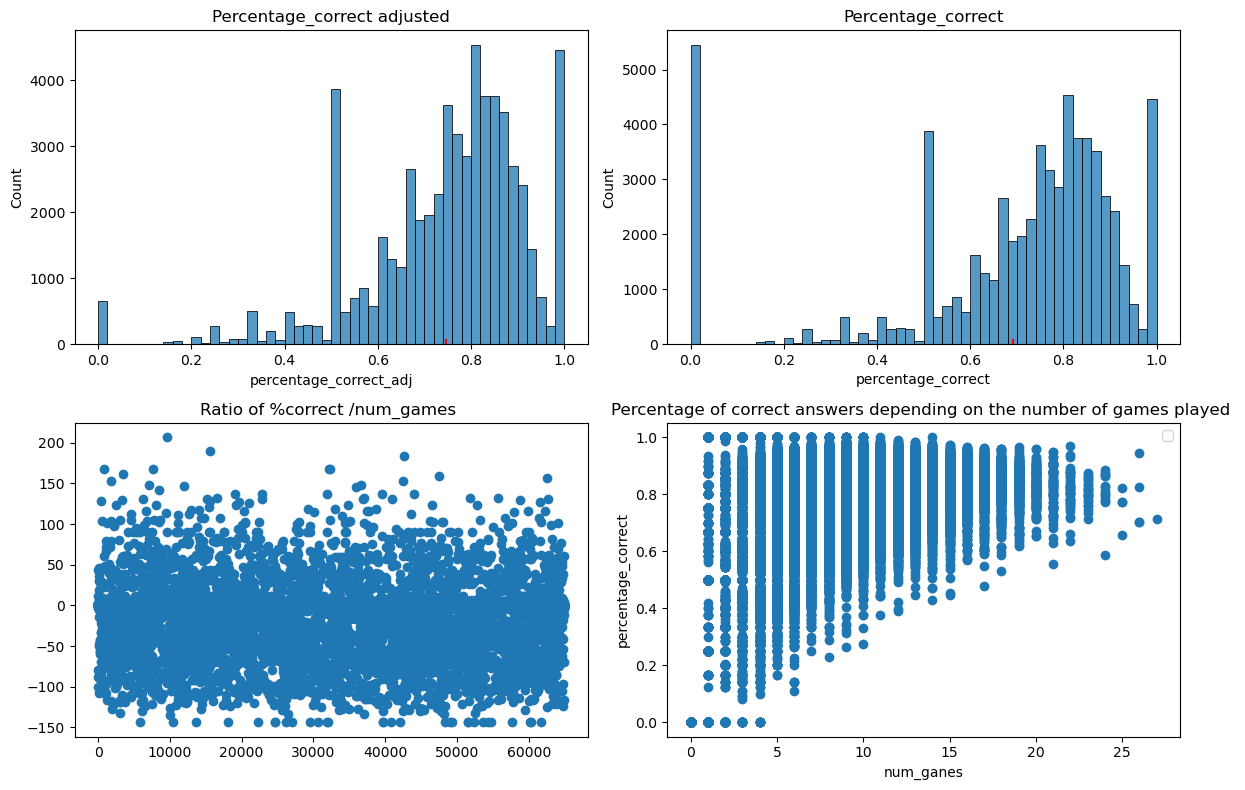

In [15]:
# Visualization
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.histplot(data=task_2a['percentage_correct_adj'], bins=50, ax = axs[0,0])
axs[0,0].set_title("Percentage_correct adjusted")
axs[0,0].vlines(np.mean(task_2a['percentage_correct_adj']), 0, 80, colors = 'r', linestyles = '-', label='mean')

sns.histplot(data=task_2a['percentage_correct'], bins=50, ax = axs[0,1])
axs[0,1].vlines(np.mean(task_2a['percentage_correct']), 0, 90, colors = 'r', linestyles = '-', label='mean')
axs[0,1].set_title("Percentage_correct")

axs[1,0].scatter(np.arange(len(users)), task_2a['ratio_%_correct_num_games'])
axs[1,0].set_title("Ratio of %correct /num_games ")

axs[1,1].scatter(np.array(task_2a['num_games']), np.array(task_2a['percentage_correct']))
axs[1, 1].set_xlabel('num_ganes')
axs[1, 1].set_ylabel('percentage_correct')
axs[1,1].set_title("Percentage of correct answers depending on the number of games played ")

plt.legend()
fig.tight_layout()


**Discussion/interpretation**

Hypothesis 1:

One can see that adjusting the percentage_correct feature increased the average value of correct_answers from 0.695 to 0.751. The hypothesis, rather obvious after all, is thus confirmed.

Hypothesis 2:

The mean ratio of the normalized features percentage_correct over num_games is positive (0.1416). The plot in the lower-right corner sheds light on the fact that the more one user plays, the higher his/her percentage of correct answer, in average (see the increasing pattern graphically). Better analysis could be perform with a multivariate analysis such as the correlation between those two features (see next section).

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

Two pairs chosen:
- **percentage_correct - num_games**

The choice of this pair of features for a multivariate analysis will allow to confirm or refute the insights found in the last question regarding the relationship between the number of games played and the percentage of correct_answers. 

The hypothesis is that the correlation between these two features is positive.

- **ui_locale - num_games**

The choice of this second pair allows to see if one nationality uses more the app than another. It could help gain some insights on how to improve the app for the other nationalities and investigate on the reasons (is the app better suited for one language in particular? do users across different countries learn differently? etc...)

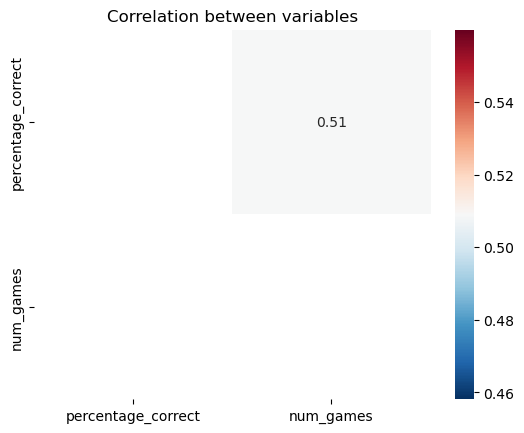

In [16]:
# Your code for multivariate analysis goes here
task_2e = task_2a[['percentage_correct', 'num_games']]

def plot_correlation(df):
    
    corr = np.round(df.corr(method='pearson'), 3)
    mask = np.tril(corr)
    ax = plt.axes()
    heatmap = sns.heatmap(corr, annot=True, mask=mask, cmap='RdBu_r')
    ax.set_title('Correlation between variables')
    plt.show() 

plot_correlation(task_2e)

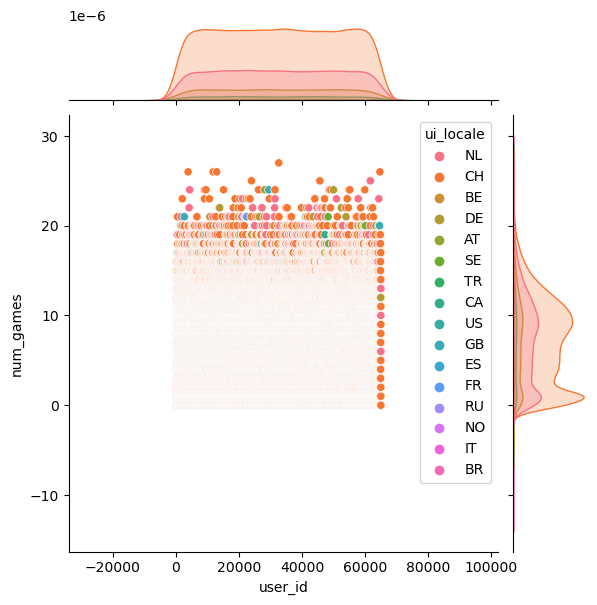

In [17]:
task_2e = task_2a[['ui_locale', 'num_games']]
sns.jointplot(data = task_2e, y = 'num_games', x = task_2e.index, hue = 'ui_locale')

**Discussion/interpretation**

Pair 1:

The correlation between the number of unique games played and the percentage of correct answers is positive (0.52), which confirms the insights found in the last question, namely the more a user plays, the better he becomes (higher percentage of correct answers), though it seems that the correlation is not that strong.

Pair 2:

The joint plot sheds light on the major presence of users from Switzerland and the Netherlands (already seen in the task 2-b) but more precisely that users from Netherlands play in average more games than the users from CH (as the curves on the right part testify, the orange curve attains its peak higher than the pink one). Also, above num_games = 15, there is a majority of orange points. One should be aware that this is only for unique games and not all the games the users played. Further analysis could look for weather the Swiss users actually play with less games in average than the Dutchs.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_shop]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**.

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: answer = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_shop**: total number of shop events **per week** (where the student wins animals for their zoo with rewards from the games).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the subtasks table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

In [18]:
task_3 = subtasks[['event_id', 'user_id', 'correct', 'subtask_finished_timestamp']]
datetime_format = pd.to_datetime(subtasks['subtask_finished_timestamp'])
# Extract the week number from the datetime column
task_3['week'] = datetime_format.dt.week

week_df = task_3[['user_id', 'week']]
user_id_week= week_df.set_index(['user_id'])
week_0 = week_df.groupby('user_id').first()
for i in week_0.index:
    user_id_week.loc[int(i), ['week']] -= week_0.loc[int(i)]

user_id_week[user_id_week['week'] < 0] += 52

task_3['week_upd'] = np.array(user_id_week['week'])
task_3.head()

/tmp/ipykernel_6686/1425745193.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  task_3['week'] = datetime_format.dt.week
/tmp/ipykernel_6686/1425745193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_3['week'] = datetime_format.dt.week
/tmp/ipykernel_6686/1425745193.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_3['week_upd'] = np.array(user_id_week['week'])


,event_id,user_id,correct,subtask_finished_timestamp,week,week_upd
subtask_id,,,,,,
1,1,2,False,2020-08-20T07:14:29.954Z,34.0,0.0
2,1,2,True,2020-08-20T07:14:29.954Z,34.0,0.0
3,3,2,True,2020-08-21T07:02:35.954Z,34.0,0.0
4,4,2,True,2020-08-24T07:03:07.167Z,35.0,1.0
5,5,2,True,2020-08-26T06:47:29.872Z,35.0,1.0


In [19]:
#test = pd.DataFrame(task_3.groupby(['user_id', 'week'])['correct'].mean())
df= pd.DataFrame()
df['num_questions'] = task_3.groupby(['user_id', 'week_upd'])['event_id'].count()
df['num_events'] = task_3.groupby(['user_id', 'week_upd'])['event_id'].unique().apply(lambda x : len(x))
df['percentage_correct'] = task_3.groupby(['user_id', 'week_upd'])['correct'].mean()*100
df.head()

num_questions  num_events  percentage_correct
user_id week_upd                                               
2       0.0                   8           6           87.500000
        1.0                  11           9          100.000000
        2.0                  10           8           80.000000
        3.0                  26           7           76.923077
        4.0                   9           8           66.666667

In [20]:
print(events['type'].unique())
shop = events[['user_id','type']]
shop = shop[shop['type'] == 'SHOP']
print(len(shop))
shop.head() # I did not manage to create the last feature num_shop unfortunately

['task' 'TRAINING_SELECTOR' 'ZOO' 'OVERVIEW' 'HELP' 'SHOP'
 'ATTENTION_BOOSTER' 'GAME_START_PAUSE']
1449


,user_id,type
event_id,,
1743,45,SHOP
3176,104,SHOP
3722,125,SHOP
6619,202,SHOP
6634,202,SHOP


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

**Discussion**

The two features that have been chosen are:

- **percentage_correct**

Hypothesis: The percentage of correct answers increase over time as the user is moving along the learning curve, he is making less and less mistakes and deepen his/her understanding.

-**num_events**

Hypothesis: The number of events realized per week is approximately constant over time.



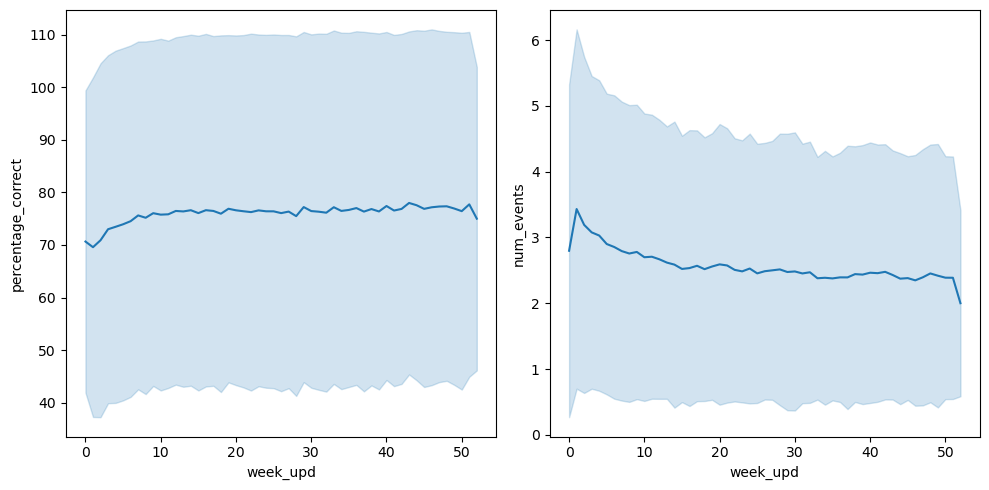

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=df, x="week_upd", y="percentage_correct", errorbar='sd', ax = ax1)
sns.lineplot(data=df, x="week_upd", y="num_events", errorbar='sd', ax = ax2)
fig.tight_layout()

The percentage of correct answers has a pretty unstable behavior, though it remains most of the time in the interval [70%,80%]. The hypothesis is thus not confirmed. Actually it seems that an average user experiences some relative ups and downs. A reason could be that when he/she performs well one week (high percentage correct), he/she moves to a more difficult task/game and struggles (lower percentage correct), possibly moving back to strenghten some sub-skills (higher percentage correct) and moving forward again, passing the difficult task, moving to a tougher one, struggling (lower percentage), moving back and so on...

One can observe that the number of events is rather steady over timer (in average around [2.8,3] events per user per week). It slightly decreases during the first 20 weeks though before being approximately constant. The hypothesis is thus partially confirmed. One could think that the users are pretty excited at the beginning of their learning journey in the app but tend to play a bit less as the weeks pass while keeping to play a constant number of events over a one year long period of time. Further analysis could try to investigate this decrease of the number of events in the first 20 weeks (less excited? bored? too difficult?).

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



As seen in task 1-c, among the top 10 games that are played, 4 are mostly played (with a different weight) while the 6 others are played uniformly. 

The hypothesis is that these 4 games are the most difficult ones and the users are sent back to these 4 games to strengthen some sub-skills to succeed the failed one. Once the sub-skills are acquired they move to the next ones without any difficulty (they are not sent back anymore as the rather uniform distribution of the frequencies of the other 6 games testifies). These 4 games would thus form the critical skills, the basis upon which the user can move on in his/her understanding.

In [22]:
print(f'Number of events: {len(events)}')
print(f'Number of subtasks: {len(subtasks)}')

import heapq

event_id_game_name = pd.DataFrame(events['game_name'])
games_per_index = dict(event_id_game_name.groupby('game_name').groups)
top_10_keys = heapq.nlargest(10, games_per_index, key=lambda x: len(games_per_index[x]))
top_10_games_event_id = {key : val for key, val in games_per_index.items() if key in top_10_keys}
sorted_top_10_games_event_id = dict(sorted(top_10_games_event_id.items(), key=lambda x: len(x[1]), reverse=True))

correct_answers_per_game= pd.DataFrame(index = top_10_games.index, columns = ['Frequence of success'])
task_2b = subtasks[['event_id', 'correct']]

corrects_array = []
incorrects_array = []
total_array = []
for k, v in sorted_top_10_games_event_id.items():
    correct = 0
    incorrect = 0
    total = 0
    for i in v:
        mask = task_2b['event_id'] == i
        selected_rows = task_2b.loc[mask]
        answers = selected_rows[['event_id','correct']]
        correct += np.sum(1*(answers['correct'] == True))
        total += len(answers['correct'])
        incorrect += np.sum(1*(answers['correct'] == False))
    correct_answers_per_game.loc[k] = correct/(correct + incorrect)
    corrects_array.append(correct)
    incorrects_array.append(incorrect)
    total_array.append(total)

Number of events: 2185200
Number of subtasks: 3502884


We see that there can be multiple subtasks for 1 event. We will consider all correct answers of the subtasks.

In [23]:
correct_answers_per_game['correct'] = corrects_array
correct_answers_per_game['incorrect'] = incorrects_array
#correct_answers_per_game['total'] = total_array
correct_answers_per_game.head(10)

,Frequence of success,correct,incorrect
Landing,0.55736,377518,299815
Conversion,0.871977,333704,48994
Comparison,0.899121,421256,47264
Distance,0.753339,133555,43729
Calculator,0.691284,98154,43834
Estimation on Number Line,0.935322,96992,6707
Order,0.779312,77289,21887
Subitizing,0.689242,122823,55377
Secret Number,0.944093,848465,50244
Estimation,0.878488,138578,19168


### Problem check : why is there so many subtasks (14381) for Secret Number?

In [24]:
mask = ~(subtasks['correct'].isin([True, False]))
missing_val_correct = np.sum(1*mask)
print(f'Number of subtasks with values != (True,False) : {missing_val_correct}')
#print(len(subtasks['correct'] != any(True | False)))

Number of subtasks with values != (True,False) : 0


In [25]:
mask = task_2b[task_2b['event_id'].isin(sorted_top_10_games_event_id['Secret Number'])]
print(f'number of subtasks of secret number: {len(mask)}')
nb_unique_event_id_for_secret_nb = len(mask['event_id'].unique())
print(f'number of unique event_id for secret number: {nb_unique_event_id_for_secret_nb}')

number of subtasks of secret number: 898709
number of unique event_id for secret number: 86825


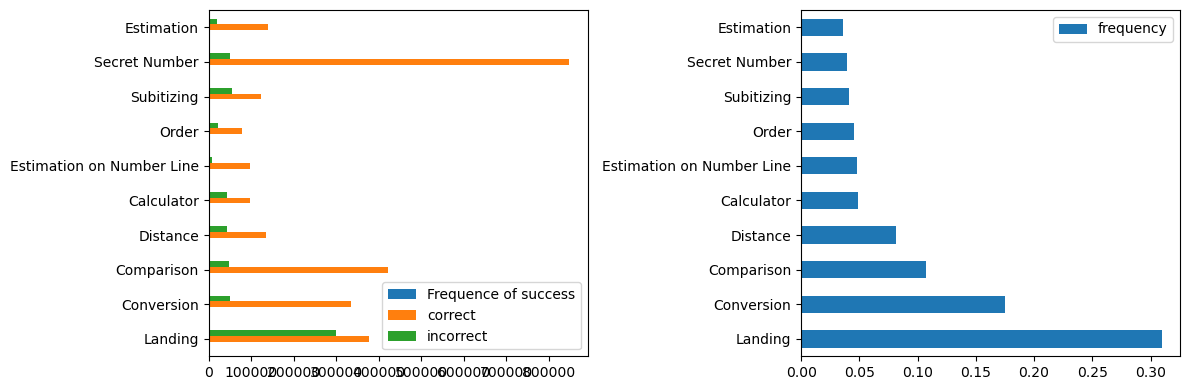

In [26]:
# Your creative visualization here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
correct_answers_per_game.plot(kind='barh', ax = ax1)
top_10_games.plot(kind='barh', ax = ax2)
fig.tight_layout()

**Discussion**

First one can see that the game "Landing" is the one that is the most failed in percentage (44% of failures according to the table). 

One can also note that the two graphs are not very similar, which is surprising. In fact, it is explained by the fact that the "Secret Number" game has a lot of subtasks in it. To have a complete understanding, one could maybe average the answers of the subtasks for event_id (as we have seen, there is 34 094 unique events and 55 047 unique subtasks). The graph on the right is based on the number of events (see task 1-c) whereas the graph on the left is based on the number of subtasks, which make the direct comparison difficult. 

Nonetheless, the graph on the left still shows that the most played game "Landing" is one of the most difficult but it is not the case for the 3 next ones. So our hypothesis is not confirmed. Further analysis, especially averaging the answers of subtasks per event_id, could bring other insights on that hypothesis.